# Testing HotVis on the office graph

In [12]:
import csv
from HotVisFunctions import *
import pandas as pd

In [13]:
# load graph
office_graph = pp.io.read_csv_temporal_graph('graphs/office/network/edges.csv', is_undirected = True, timestamp_format='%S')
# load metadata
meta_data = pd.read_csv("graphs/office/network/nodes.csv")


Every class gets its own color.

In [14]:
print(meta_data["department"].unique())

['DSE' 'DMCT' 'DISQ' 'SRH' 'SFLE']


In [15]:
colors = {}
color_map = {'DSE': 'yellow', 'DMCT': 'green', 'DISQ': 'blue', 'SRH':'pink', 'SFLE':'black'}
for index, row in meta_data.iterrows():
        colors[f"{row['index']}"] = color_map[row['department']]
style = {}
style['node_color'] = colors
style['node_size'] = 10
style['edge_size'] = 0.1
style['edge_opacity'] = 1


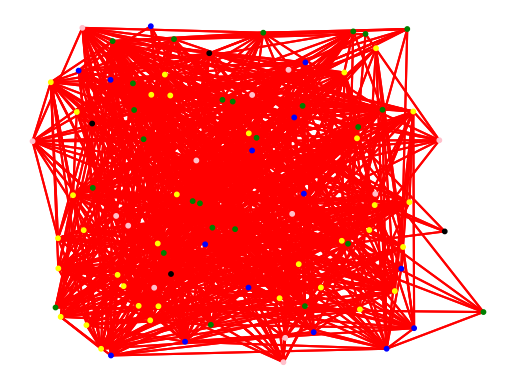

In [16]:
pp.plot(office_graph.to_static_graph(), backend='matplotlib' ,**style)

Wenn delta zu klein gibts fehler?

In [17]:
layout_2 =  HotVis(office_graph, 2, 50000, 50, alpha=[1, 0.5], force=10)
layout_3 =  HotVis(office_graph, 3, 50000, 50, alpha=[1, 0.5, 0.3], force=10)
layout_5 =  HotVis(office_graph, 5, 50000, 50, alpha=[1, 0.5, 0.3, 0.25, 0.2], force=10)


100%|██████████| 50000/50000 [00:11<00:00, 4474.52it/s]


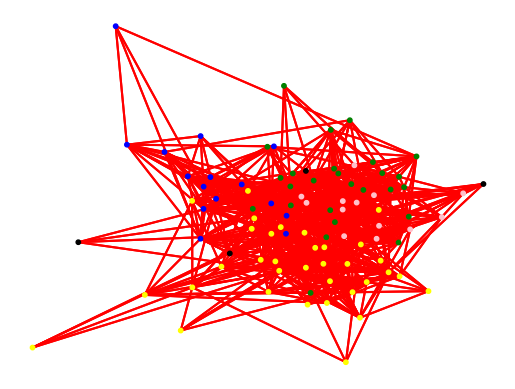

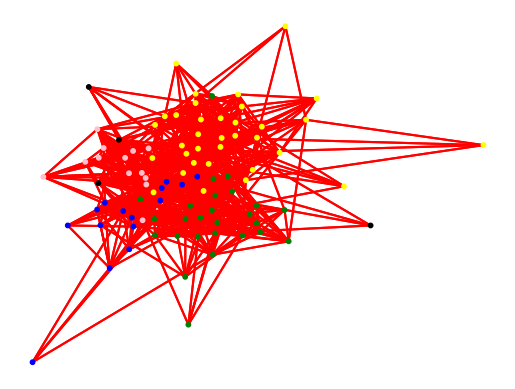

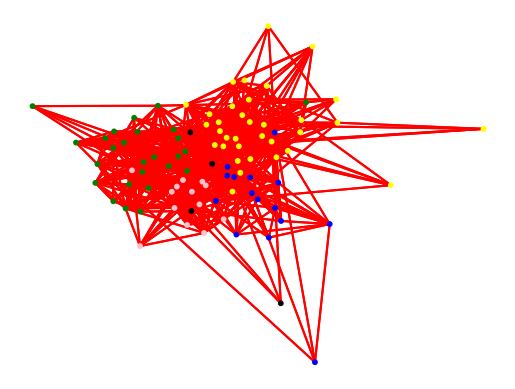

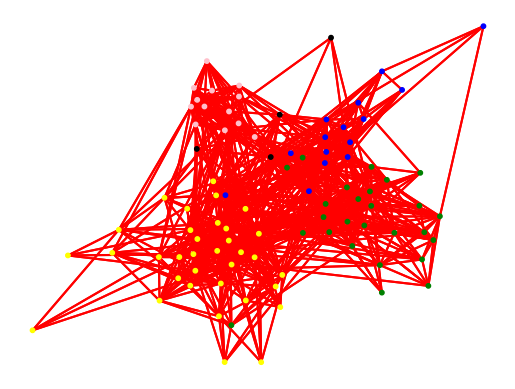

In [18]:
pp.plot(office_graph.to_static_graph(), layout=layout_2, backend='matplotlib' ,**style)
pp.plot(office_graph.to_static_graph(), layout=layout_3, backend='matplotlib' ,**style)
pp.plot(office_graph.to_static_graph(), layout=layout_5, backend='matplotlib' ,**style)
pp.plot(office_graph.to_static_graph(), layout="fr", backend='matplotlib' ,**style)

In [19]:
clusters = meta_data.groupby('department')['index'].apply(list).values
clusters = [[str(i) for i in cluster] for cluster in clusters]
# filter nodes, wich doesn't occure in graph
valid_nodes = set(office_graph.mapping.node_ids)
clusters = [list(filter(lambda node: node in set(office_graph.mapping.node_ids), cluster)) for cluster in clusters]
# filter empty lists
clusters = [lst for lst in clusters if lst]
print(clusters)

[['4', '25', '35', '36', '41', '48', '49', '50', '52', '55', '74', '75', '79', '86', '87'], ['1', '2', '6', '7', '10', '12', '15', '16', '17', '20', '21', '27', '33', '40', '46', '56', '57', '59', '60', '67', '76', '78', '81', '84', '88', '89'], ['0', '3', '5', '8', '11', '14', '18', '22', '24', '26', '31', '32', '34', '37', '38', '39', '44', '45', '47', '51', '54', '58', '64', '65', '68', '71', '72', '77', '80', '82', '83', '85', '90', '91'], ['13', '19', '42', '43'], ['9', '23', '28', '29', '30', '53', '61', '62', '63', '66', '69', '70', '73']]


In [20]:
print(cluster_distance_ratio(office_graph, clusters, layout_2))
print(cluster_distance_ratio(office_graph, clusters, layout_3))
print(cluster_distance_ratio(office_graph, clusters, layout_5))

tensor([0.5086, 0.5829, 0.6396, 1.2386, 0.4176])
tensor([0.4832, 0.5069, 0.5879, 1.2823, 0.3411])
tensor([0.4870, 0.4908, 0.5782, 0.8152, 0.3359])


In [21]:
#print(edge_crossing(office_graph, layout_2))
#print(edge_crossing(office_graph, layout_3))
#print(edge_crossing(office_graph, layout_5))

In [22]:
print(causal_path_dispersion(office_graph, layout_2, 50))
print(causal_path_dispersion(office_graph, layout_3, 50))
print(causal_path_dispersion(office_graph, layout_5, 50))

100%|██████████| 7104/7104 [00:05<00:00, 1409.25it/s]


tensor(1.0388, dtype=torch.float64)


100%|██████████| 7104/7104 [00:03<00:00, 2075.64it/s]


tensor(0.9632, dtype=torch.float64)


100%|██████████| 7104/7104 [00:03<00:00, 2068.64it/s]


tensor(0.9536, dtype=torch.float64)


In [23]:
print(closeness_eccentricity(office_graph, layout_2, 50, 0.1))
print(closeness_eccentricity(office_graph, layout_3, 50, 0.1))
print(closeness_eccentricity(office_graph, layout_5, 50, 0.1))

100%|██████████| 7104/7104 [00:03<00:00, 1843.33it/s]
/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:234: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  path_indices = torch.tensor(paths.mapping.to_idxs(path))


tensor(0.6854, dtype=torch.float64)


100%|██████████| 7104/7104 [00:03<00:00, 2067.75it/s]


tensor(0.5616, dtype=torch.float64)


100%|██████████| 7104/7104 [00:03<00:00, 2014.98it/s]


tensor(0.5688, dtype=torch.float64)
